<html>
<body>
<h1 style="background-color: #00364A;"><center>
    <br><font size="+3.5">
    <font color=#F1C9FE><b>  </b></font>
   </font>
    <br><font size="+3.5">
    <font color=#F1C9FE><b>Palmer's Penguins Data Analysis Project</b></font>
   </font>
    <br><font size="+1">
    <font color=#F1C9FE><b>  </b> Leigherin Hurd </font> <br>
    <font color=#F1C9FE><b>  </b> 8/18/2024 </font>
   </font> 
    </center>
</h1>
</body>
</html>


The original Palmer's Penguins dataset was based on data collected in the Palmer Archipelago near Antarctica, the dataset provides information on three species of penguins, including Adélie, Gentoo, and Chinstrap, and covers essential biological metrics such as bill dimensions and body mass.

The Palmer's Penguins Dataset Extended includes additional variables like diet, year of observation, life stage, and health metrics. These extra features allow for a more nuanced understanding of penguin biology and ecology.

________________________________________________
### Data Questions
* Determine whether the primary diet of a species of penguin has a correlation to their weight over time. 
* If the weight decreases over time on that diet, does that show a potential change in the supply of food?
* Do the species change primary diets over the time period to adapt to the scarcity?


### Project Objective

* The objectives of this project are to:
  1. Examine Palmer Penguins data for adult penguins to gain an understanding of variables associated with diet type, penguin weight,        location, and health metrics.
  2. Determine factors that can be used to predict penguin health based on diet source and location.

### Hypothesis

* It is hypothesized that diet and location of the adult Palmer Penguin species are predictors of health metrics and body mass.

<html>
<h2 style="background-color: #00364A;">
<font size="+2"><br>
    <font color=#F1C9FE><b>&nbsp;   &nbsp; Data Ingestion</b></font>
    </font>  <br>
</h2>
</html>

The Palmer Penguins data was obtained from the following site:  https://www.kaggle.com/datasets/samybaladram/palmers-penguin-dataset-extended

The dataset consists of the following variables:

* Species: Species of the penguin (Adelie, Chinstrap, Gentoo)
* Island: Island where the penguin was found (Biscoe, Dream, Torgensen)
* Sex: Gender of the penguin (Male, Female)
* Diet: Primary diet of the penguin (Fish, Krill, Squid)
* Year: Year the data was collected (2021-2025)
* Life Stage: The life stage of the penguin (Chick, Juvenile, Adult)
* Body Mass (g): Body mass in grams
* Bill Length (mm): Bill length in millimeters
* Bill Depth (mm): Bill depth in millimeters
* Flipper Length (mm): Flipper length in millimeters
* Health Metrics: Health status of the penguin (Healthy, Overweight, Underweight)

### Imports

In [1]:
# Import packages for processing and analysis
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from pandas.plotting import parallel_coordinates

import statsmodels.api as sm

### Import Palmer Penguins Extended DataSet

In [2]:
# Read the Data
penguins_extended = pd.read_csv('palmerpenguins_extended.csv')

<html>
<h2 style="background-color: #00364A;">
<font size="+2"><br>
    <font color=#F1C9FE><b>&nbsp;   &nbsp; Data Cleaning</b></font>
    </font>  <br>
</h2>
</html>

### Review File Contents
* First step in the data exploration and cleaning process is to determine what data elements are in the file. This is done by calling the <b>info method</b> of the dataframe class. The output below shows there are 3430 rows and 11 columns in the palmer penguins extended dataset.
* Included in the dataset are data types of both objects and numeric data. In this file, the data elements with an 'object' data type likely contain string data. To confirm, the data type 'object' values should be checked to verify irrelevant data does not exist.
* There are no null values since the non-null count of 3430 for all columns matches the total count of 3430 entries in the dataset.

In [3]:
penguins_extended.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            3430 non-null   object 
 1   island             3430 non-null   object 
 2   bill_length_mm     3430 non-null   float64
 3   bill_depth_mm      3430 non-null   float64
 4   flipper_length_mm  3430 non-null   float64
 5   body_mass_g        3430 non-null   float64
 6   sex                3430 non-null   object 
 7   diet               3430 non-null   object 
 8   life_stage         3430 non-null   object 
 9   health_metrics     3430 non-null   object 
 10  year               3430 non-null   int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 294.9+ KB


### Display Data Rows
* Investigate the dataset by displaying a few rows at the beginning of the dataset using the <b>head method</b>.
* We will also display a random sample of the data rows to explore the dataset further using the <b>sample method</b>.
* This shows the data elements of 'object' type have string data, so the 'object' data types are relevant.

In [4]:
penguins_extended.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,adult,overweight,2021
1,Adelie,Biscoe,49.3,18.1,245.0,6811.0,female,fish,adult,overweight,2021
2,Adelie,Biscoe,55.7,16.6,226.0,5388.0,female,fish,adult,overweight,2021


In [5]:
penguins_extended.sample(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
2683,Adelie,Biscoe,26.9,19.1,175.0,2875.0,female,parental,chick,healthy,2025
698,Chinstrap,Dream,29.1,21.2,201.0,4150.0,female,krill,juvenile,healthy,2022
946,Gentoo,Biscoe,32.5,16.9,194.0,3740.0,female,parental,chick,healthy,2022
177,Chinstrap,Dream,28.3,19.5,180.0,3766.0,female,krill,juvenile,underweight,2021
2945,Adelie,Torgensen,40.3,14.8,158.0,3040.0,female,parental,chick,healthy,2025


### Explore Specific Data Elements in the Dataset 
* Looking at the unique values, value counts, and displaying data in graphical form are other ways to review the dataset
* The <b>unique</b> and <b>nunique methods</b> are used to determine the unique values and the number of unique values
* The <b> value counts method </b> is used to determine the expected count of adult penguin entries in the dataset 
* The data variables are also displayed graphically for a visual depiction of the data

### Determine Unique Data
* It is important to determine unique diet types and life stages in the dataset for analysis
* The <b>nunique method</b> and the <b>unique method</b> are called the determine the diet types and life stages in the dataset and their associated unique counts
* There are 4 unique penguin diets and 3 life stages in the dataset
* The <b> value counts method </b> displays the total count of each life stage

In [6]:
# Display unique diets and counts of unique diets
print('Number of unique penguin diets: ',penguins_extended['diet'].nunique())
print('Names of unique penguin diets: ',penguins_extended['diet'].unique())
print()
# Display unique life stages and counts of unique life stages
print('Number of unique penguin life stages: ',penguins_extended['life_stage'].nunique())
print('Names of unique penguin life stages: ',penguins_extended['life_stage'].unique())
print()
# Count total of each unique life stage included in dataset 'penguins_extended' and display totals organized by life stage
print('Total number of penguins for each life stage: ',penguins_extended["life_stage"].value_counts())

Number of unique penguin diets:  4
Names of unique penguin diets:  ['fish' 'krill' 'parental' 'squid']

Number of unique penguin life stages:  3
Names of unique penguin life stages:  ['adult' 'juvenile' 'chick']

Total number of penguins for each life stage:  life_stage
juvenile    1541
adult       1029
chick        860
Name: count, dtype: int64


### Filter and Remove Columns of Data Not Needed for Analysis
* Remove the columns for bill length, bill depth, and flipper length in the dataset by using <b>drop method</b>
* Filter out the entries with the diet type of parental as this is a diet type provided to chicks by the adult penguins through regurgitation and does not specify the source of the diet (eg. krill).
* Since adult penguins are the most independent in foraging for food, the penguin entries in the juvenile and chick life stages will be excluded from the analysis.
* Since a chick's diet is exclusively parental, the filtering out of all life stages except adult will eliminate the need to filter diet.
* The new dataset adult_penguins shows 1029 rows, which matches the life stage count of 1029 for adult penguins.

In [7]:
# Remove columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
filtered_penguins_extended = penguins_extended.drop(columns=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'])
display(filtered_penguins_extended)

,species,island,body_mass_g,sex,diet,life_stage,health_metrics,year
0,Adelie,Biscoe,5687.0,female,fish,adult,overweight,2021
1,Adelie,Biscoe,6811.0,female,fish,adult,overweight,2021
2,Adelie,Biscoe,5388.0,female,fish,adult,overweight,2021
3,Adelie,Biscoe,6262.0,female,fish,adult,overweight,2021
4,Adelie,Biscoe,4811.0,female,fish,juvenile,overweight,2021
...,...,...,...,...,...,...,...,...
3425,Gentoo,Biscoe,6447.0,male,squid,adult,healthy,2025
3426,Gentoo,Biscoe,6872.0,male,squid,adult,healthy,2025
3427,Gentoo,Biscoe,7409.0,male,squid,adult,overweight,2025
3428,Gentoo,Biscoe,6491.0,male,squid,adult,healthy,2025


### Create New Filtered Penguins DataSet

In [8]:
# Filter for life_stage = ['adult'] and create new dataset
adult_penguins = filtered_penguins_extended[filtered_penguins_extended['life_stage'] == 'adult'] 
display(adult_penguins)

,species,island,body_mass_g,sex,diet,life_stage,health_metrics,year
0,Adelie,Biscoe,5687.0,female,fish,adult,overweight,2021
1,Adelie,Biscoe,6811.0,female,fish,adult,overweight,2021
2,Adelie,Biscoe,5388.0,female,fish,adult,overweight,2021
3,Adelie,Biscoe,6262.0,female,fish,adult,overweight,2021
6,Adelie,Biscoe,5961.0,female,fish,adult,overweight,2021
...,...,...,...,...,...,...,...,...
3425,Gentoo,Biscoe,6447.0,male,squid,adult,healthy,2025
3426,Gentoo,Biscoe,6872.0,male,squid,adult,healthy,2025
3427,Gentoo,Biscoe,7409.0,male,squid,adult,overweight,2025
3428,Gentoo,Biscoe,6491.0,male,squid,adult,healthy,2025


### Update Weight Units to Imperial System of Measurement 
* Change body mass weight units from grams to pounds

In [9]:
# Convert body_mass_g from grams into pounds and remove 'body_mass_g' column
adult_penguins = adult_penguins.assign(body_mass_lbs=adult_penguins.body_mass_g * 0.00220462)
display(adult_penguins)

,species,island,body_mass_g,sex,diet,life_stage,health_metrics,year,body_mass_lbs
0,Adelie,Biscoe,5687.0,female,fish,adult,overweight,2021,12.537674
1,Adelie,Biscoe,6811.0,female,fish,adult,overweight,2021,15.015667
2,Adelie,Biscoe,5388.0,female,fish,adult,overweight,2021,11.878493
3,Adelie,Biscoe,6262.0,female,fish,adult,overweight,2021,13.805330
6,Adelie,Biscoe,5961.0,female,fish,adult,overweight,2021,13.141740
...,...,...,...,...,...,...,...,...,...
3425,Gentoo,Biscoe,6447.0,male,squid,adult,healthy,2025,14.213185
3426,Gentoo,Biscoe,6872.0,male,squid,adult,healthy,2025,15.150149
3427,Gentoo,Biscoe,7409.0,male,squid,adult,overweight,2025,16.334030
3428,Gentoo,Biscoe,6491.0,male,squid,adult,healthy,2025,14.310188


In [10]:
# Use split columns, remove rows with missing values, 
#remove values that are nonsense, convert data types, etc.

<html>
<h2 style="background-color: #00364A;">
<font size="+2"><br>
    <font color=#F1C9FE><b>&nbsp;   &nbsp; Exploratory Data Analysis </b></font>
    </font>  <br>
</h2>
</html>

### Explore the Diet Type Element

In [11]:
# Display number of unique diet values 
print('There are ', adult_penguins['diet'].nunique(), 'unique Diets in the dataset')
# Display list of unique diet values
print('\nUnique Diets:\n',sorted(adult_penguins['diet'].unique()))
# Display total count of each unique diet value
print('\nDiet Counts\n', adult_penguins['diet'].value_counts().sort_index(ascending=True))
# Display percentage of each unique diet value based on count
print('\nDiet Percentages\n', (adult_penguins['diet'].value_counts().sort_index(ascending=True) / 1029) * 100 )

There are  3 unique Diets in the dataset

Unique Diets:
 ['fish', 'krill', 'squid']

Diet Counts
 diet
fish     482
krill    425
squid    122
Name: count, dtype: int64

Diet Percentages
 diet
fish     46.841594
krill    41.302235
squid    11.856171
Name: count, dtype: float64


### Adult Penguins by Primary Diet
* Plotting data on both standard bar chart and stacked bar chart to help visualize deeper understanding of data
* The least consumed primary diet by adult penguins is squid, while fish and krill are the most common primary diets
* The primary diet of the Gentoo penguin is fish, while the primary diet of the Chinstrap is krill. 

species  Adelie  Chinstrap  Gentoo
diet                              
fish        188         49     245
krill       206         97     122
squid        55         22      45


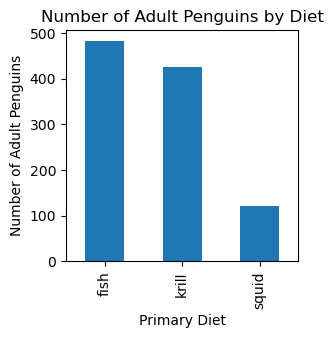

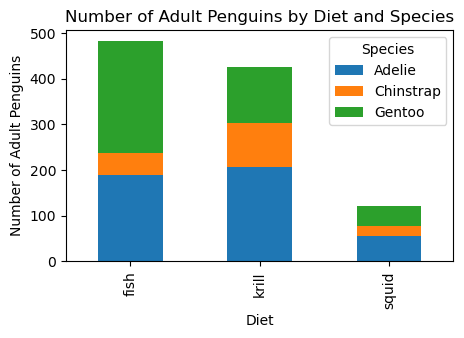

In [12]:
# Plot bar graph showing adult penguin count by diet type
penguin_diet = adult_penguins['diet'].value_counts().sort_index(ascending=True)
fig, axs = plt.subplots(1, 1, figsize=(3, 3))
penguin_diet.plot(kind='bar', ax=axs)
axs.set_title('Number of Adult Penguins by Diet')
axs.set_xlabel('Primary Diet')
axs.set_ylabel('Number of Adult Penguins')


# Creating crosstab
crosstab = pd.crosstab(adult_penguins['diet'], adult_penguins['species'])
print(crosstab)

# Creating barplot
# Plot the crosstab data
fig, axs = plt.subplots(figsize=(5, 3))

# Plot the crosstab as a stacked bar chart
crosstab.plot(kind='bar', stacked=True, ax=axs)

# Set the title and labels
axs.set_title('Number of Adult Penguins by Diet and Species')
axs.set_xlabel('Diet')
axs.set_ylabel('Number of Adult Penguins')

# Show the legend
axs.legend(title='Species')

# Show the plot
plt.show()

### Explore the Species Type Element

In [13]:
# Display number of unique species 
print('There are ', adult_penguins['species'].nunique(), 'unique Species in the dataset')
# Display list of unique species
print('\nUnique Species:\n',sorted(adult_penguins['species'].unique()))
# Display total count of each unique species
print('\nSpecies Counts\n', adult_penguins['species'].value_counts().sort_index(ascending=True))
# Display percentage of each unique species based on count
print('\nSpecies Percentages\n', (adult_penguins['species'].value_counts().sort_index(ascending=True) / 1029) * 100 )

There are  3 unique Species in the dataset

Unique Species:
 ['Adelie', 'Chinstrap', 'Gentoo']

Species Counts
 species
Adelie       449
Chinstrap    168
Gentoo       412
Name: count, dtype: int64

Species Percentages
 species
Adelie       43.634597
Chinstrap    16.326531
Gentoo       40.038873
Name: count, dtype: float64


### Adult Penguins by Species
* The Chinstrap species is the smallest group of adult penguins, while the Adelie and Gentoo are similar in size
* The overall ratio of male to female penguins in each species group is close to equal

sex        female  male
species                
Adelie        226   223
Chinstrap      96    72
Gentoo        196   216


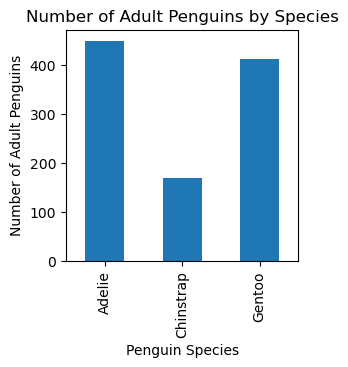

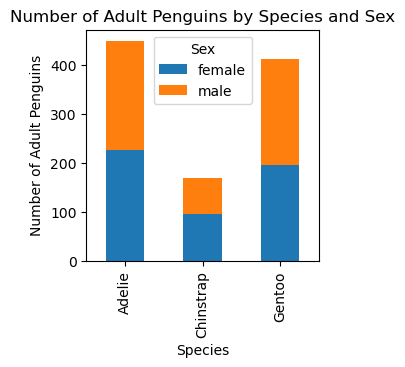

In [14]:
# Plot bar graph showing count of adult penguins by species type
penguin_species = adult_penguins['species'].value_counts().sort_index(ascending=True)
fig, axs = plt.subplots(1, 1, figsize=(3, 3))
penguin_species.plot(kind='bar', ax=axs)
axs.set_title('Number of Adult Penguins by Species')
axs.set_xlabel('Penguin Species')
axs.set_ylabel('Number of Adult Penguins')

# Creating crosstab to identify ratio of male to female penguins in each species 
species_crosstab = pd.crosstab(adult_penguins['species'], adult_penguins['sex'])
print(species_crosstab)
# Creating barplot
# Plot the crosstab data
fig, axs = plt.subplots(figsize=(3, 3))

# Plot the crosstab as a stacked bar chart
species_crosstab.plot(kind='bar', stacked=True, ax=axs)

# Set the title and labels
axs.set_title('Number of Adult Penguins by Species and Sex')
axs.set_xlabel('Species')
axs.set_ylabel('Number of Adult Penguins')

# Show the legend
axs.legend(title='Sex')

# Show the plot
plt.show()

### Explore Island Location Element

In [15]:
# Display number of unique islands
print('There are ', adult_penguins['island'].nunique(), 'unique Islands in the dataset')
# Display list of unique islands
print('\nUnique Islands:\n',sorted(adult_penguins['island'].unique()))
# Display total count of adults on each unique island
print('\nIsland Counts of Adult Penguins\n', adult_penguins['island'].value_counts().sort_index(ascending=True))
# Display percentage of adults on each unique island based on count
print('\nPercentage of Adults on each Island\n', (adult_penguins['island'].value_counts().sort_index(ascending=True) / 1029) * 100 )

There are  3 unique Islands in the dataset

Unique Islands:
 ['Biscoe', 'Dream', 'Torgensen']

Island Counts of Adult Penguins
 island
Biscoe       573
Dream        296
Torgensen    160
Name: count, dtype: int64

Percentage of Adults on each Island
 island
Biscoe       55.685131
Dream        28.765792
Torgensen    15.549077
Name: count, dtype: float64


### Adult Penguins by Island
* Most adult penguins live on Biscoe Island and the least inhabited island by adult penguins is Torgensen
* The only species living on Torgensen island is the Adelie penguin, in fact they are on all three islands
* The Gentoo and Chinstrap penguins separately inhabit one island each that is shared with Adelie penguins

species    Adelie  Chinstrap  Gentoo
island                              
Biscoe        161          0     412
Dream         128        168       0
Torgensen     160          0       0


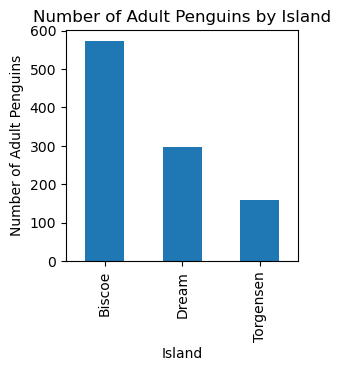

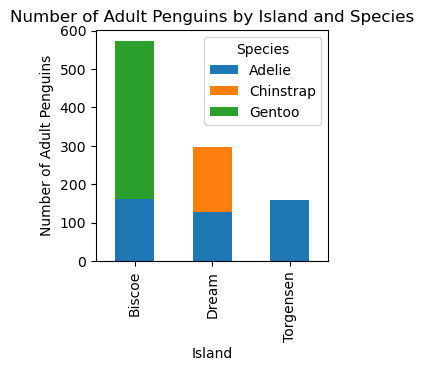

In [16]:
# Plot bar graph showing count of adult penguins on each island
penguin_island = adult_penguins['island'].value_counts().sort_index(ascending=True)
fig, axs = plt.subplots(1, 1, figsize=(3, 3))
penguin_island.plot(kind='bar', ax=axs)
axs.set_title('Number of Adult Penguins by Island')
axs.set_xlabel('Island')
axs.set_ylabel('Number of Adult Penguins')

# Creating crosstab to determine species on each island
island_crosstab = pd.crosstab(adult_penguins['island'], adult_penguins['species'])
print(island_crosstab)
# Creating barplot
# Plot the crosstab data
fig, axs = plt.subplots(figsize=(3, 3))

# Plot the crosstab as a stacked bar chart
island_crosstab.plot(kind='bar', stacked=True, ax=axs)

# Set the title and labels
axs.set_title('Number of Adult Penguins by Island and Species')
axs.set_xlabel('Island')
axs.set_ylabel('Number of Adult Penguins')

# Show the legend
axs.legend(title='Species')

# Show the plot
plt.show()

### Explore Primary Diet on Torgensen Island
* Adelie penguins that inhabit Torgensen Island consume all three types of diets with fish dominating as the primary diet and krill being a close second

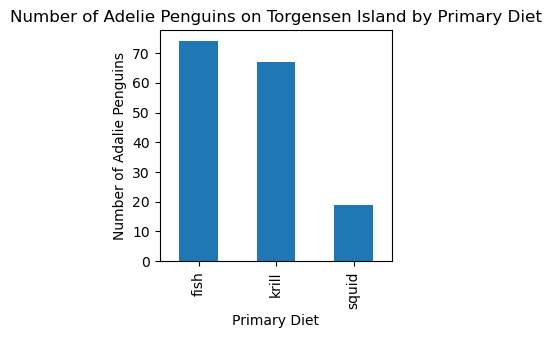

In [17]:
# Create dataframe of all adult penguins on Torgensen Island
torgensen_penguins = adult_penguins[adult_penguins['island'] == 'Torgensen'] 

# Plot bar graph showing diet counts of Adelie penguins on Torgensen island
penguin_island = torgensen_penguins['diet'].value_counts().sort_index(ascending=True)
fig, axs = plt.subplots(1, 1, figsize=(3, 3))
penguin_island.plot(kind='bar', ax=axs)
axs.set_title('Number of Adelie Penguins on Torgensen Island by Primary Diet')
axs.set_xlabel('Primary Diet')
axs.set_ylabel('Number of Adalie Penguins')
plt.show()

### Explore Adult Penguin Health Metrics Element

In [18]:
# Display number of unique health metrics
print('There are ', adult_penguins['health_metrics'].nunique(), 'unique Health Metrics in the dataset')
# Display list of unique health metrics
print('\nUnique Health Metrics:\n',sorted(adult_penguins['health_metrics'].unique()))
# Display total count of adults on each unique island
print('\nHealth Metrics counts for Adult Penguins\n', adult_penguins['health_metrics'].value_counts().sort_index(ascending=True))
# Display percentage of adults on each unique island based on count
print('\nPercentage of Adult Penguins in each category of Health Metrics\n', (adult_penguins['health_metrics'].value_counts().sort_index(ascending=True) / 1029) * 100 )

There are  3 unique Health Metrics in the dataset

Unique Health Metrics:
 ['healthy', 'overweight', 'underweight']

Health Metrics counts for Adult Penguins
 health_metrics
healthy        362
overweight     484
underweight    183
Name: count, dtype: int64

Percentage of Adult Penguins in each category of Health Metrics
 health_metrics
healthy        35.179786
overweight     47.035957
underweight    17.784257
Name: count, dtype: float64


### Adult Penguins by Health Metric
* Most adult penguins are overweight and a smaller number are considered underweight
* Female penguins have an overall healthier weight than male penguins
* Male penguins are most likely to be less healthy, either overweight or underweight, compared to female penguins

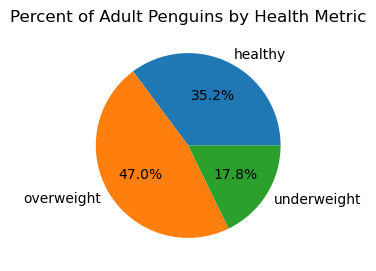

sex             female  male
health_metrics              
healthy            200   162
overweight         236   248
underweight         82   101


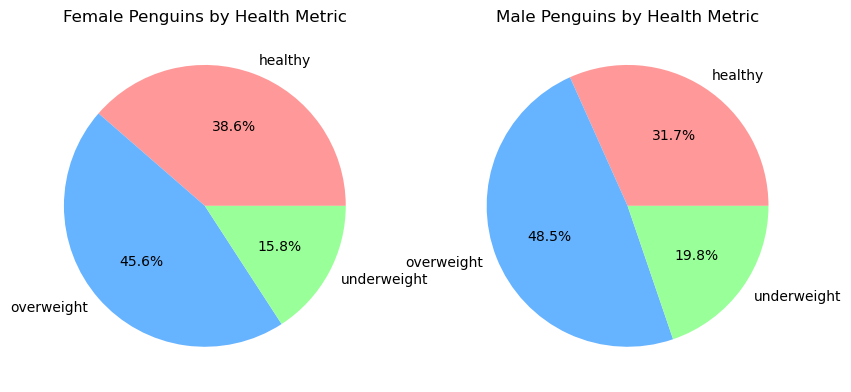

In [19]:
# Plot pie chart showing percentage of adult penguins by health metric
penguin_health_metrics = adult_penguins['health_metrics'].value_counts().sort_index(ascending=True)
labels = 'healthy', 'overweight', 'underweight'
fig, axs = plt.subplots(figsize=(3, 3))
axs.pie(penguin_health_metrics, labels=labels, autopct='%1.1f%%')
axs.set_title('Percent of Adult Penguins by Health Metric')
plt.show()

# Crosstab for health metrics by sex
health_metrics_crosstab = pd.crosstab(adult_penguins['health_metrics'], adult_penguins['sex'])
print(health_metrics_crosstab)

# Create subplots for each sex
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart for females
axs[0].pie(health_metrics_crosstab['female'], labels=health_metrics_crosstab.index, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff', '#99ff99'])
axs[0].set_title('Female Penguins by Health Metric')

# Pie chart for males
axs[1].pie(health_metrics_crosstab['male'], labels=health_metrics_crosstab.index, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff', '#99ff99'])
axs[1].set_title('Male Penguins by Health Metric')

plt.show()


### Grouping and Aggregating Data
* Grouping data by specified columns: year, diet, island, species, sex, and health metrics
* The data is organized into groups based on unique combinations of these column values.
* An aggregation function is appied to grouped data to calculate the mean (average) of the body mass in pounds column for each group defined in the <b>groupby method</b>

In [20]:
grouped_adult_penguins = adult_penguins.groupby(['year','diet','island','species','sex','health_metrics']).agg({'body_mass_lbs':'mean'}).reset_index()
display(grouped_adult_penguins)

,year,diet,island,species,sex,health_metrics,body_mass_lbs
0,2021,fish,Biscoe,Adelie,female,overweight,13.275781
1,2021,fish,Biscoe,Adelie,male,healthy,13.051350
2,2021,fish,Biscoe,Adelie,male,overweight,14.338848
3,2021,fish,Biscoe,Gentoo,female,healthy,12.478590
4,2021,fish,Biscoe,Gentoo,female,overweight,15.271572
...,...,...,...,...,...,...,...
279,2025,squid,Dream,Adelie,male,underweight,10.158889
280,2025,squid,Dream,Chinstrap,female,overweight,13.393066
281,2025,squid,Dream,Chinstrap,male,overweight,15.321007
282,2025,squid,Torgensen,Adelie,female,overweight,11.255687


### Heatmap representation of Body Mass by Species and Diet
* The Adelie penguin has the lowest average body mass across all diet types and the Gentoo penguin has the overall highest body mass across all diet types.
* The diet that appears to have the overall lowest associated body mass across all species is krill.

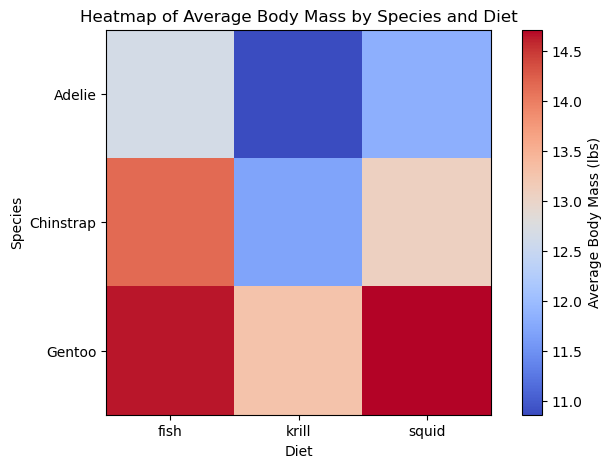

In [21]:
# Pivot data for heatmap
heatmap_data = grouped_adult_penguins.pivot_table(index='species', columns='diet', values='body_mass_lbs')

# Create a heatmap
plt.figure(figsize=(8, 5))

plt.imshow(heatmap_data, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Average Body Mass (lbs)')

plt.xticks(ticks=np.arange(len(heatmap_data.columns)), labels=heatmap_data.columns)
plt.yticks(ticks=np.arange(len(heatmap_data.index)), labels=heatmap_data.index)

plt.xlabel('Diet')
plt.ylabel('Species')
plt.title('Heatmap of Average Body Mass by Species and Diet')
plt.show()

### Box plot showing Distribution of Body Mass by Diet
* The distribution of body mass for the krill diet has the lowest average weight for penguins on this primary diet
* Fish shows a slightly higher average body mass for penguins with this primary diet

quartiles_by_body_mass_lbs
Q1    71
Q2    71
Q3    71
Q4    71
Name: count, dtype: int64


,year,diet,island,species,sex,health_metrics,body_mass_lbs,quartiles_by_body_mass_lbs
0,2021,fish,Biscoe,Adelie,female,overweight,13.275781,Q3
1,2021,fish,Biscoe,Adelie,male,healthy,13.051350,Q3
2,2021,fish,Biscoe,Adelie,male,overweight,14.338848,Q4
3,2021,fish,Biscoe,Gentoo,female,healthy,12.478590,Q3
4,2021,fish,Biscoe,Gentoo,female,overweight,15.271572,Q4
...,...,...,...,...,...,...,...,...
279,2025,squid,Dream,Adelie,male,underweight,10.158889,Q1
280,2025,squid,Dream,Chinstrap,female,overweight,13.393066,Q3
281,2025,squid,Dream,Chinstrap,male,overweight,15.321007,Q4
282,2025,squid,Torgensen,Adelie,female,overweight,11.255687,Q2


<Figure size 100x100 with 0 Axes>

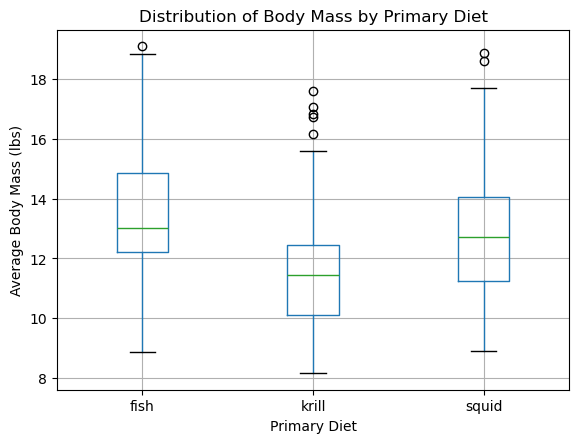

In [22]:
# Using .qcut() to calculate the size of each bin in order to make sure the distribution of data in the bins is equal
# q=4 calls out the number of bins to distribute data into and then assigning labels for each quartile bin (Q1, Q2, Q3, Q4)
grouped_adult_penguins["quartiles_by_body_mass_lbs"] = pd.qcut(
    grouped_adult_penguins["body_mass_lbs"], q=4, labels=["Q1", "Q2", "Q3", "Q4"]
)

# Display distribution of body mass (lbs) by quartile to verify equal distribution
print(grouped_adult_penguins["quartiles_by_body_mass_lbs"].value_counts())

# Display DataFrame with new column 'quartiles_by_body_mass_lbs'
display(grouped_adult_penguins)

# Create a box plot
plt.figure(figsize=(1, 1))

grouped_adult_penguins.boxplot(column='body_mass_lbs', by='diet', grid=True)
plt.xlabel('Primary Diet')
plt.ylabel('Average Body Mass (lbs)')
plt.title('Distribution of Body Mass by Primary Diet')
plt.suptitle('')  # Remove default title
plt.show()


### Exploring the Upper Quartile Mass of Adult Penguins
* The upper quartile mass of adult penguins is mostly concentrated in the 14-16 pound range with mulitple outliers falling in the 17-19 pound weight range

There are  71 unique weights in the dataset
Range of weights: 14.0324063 lbs to 19.1140554 lbs


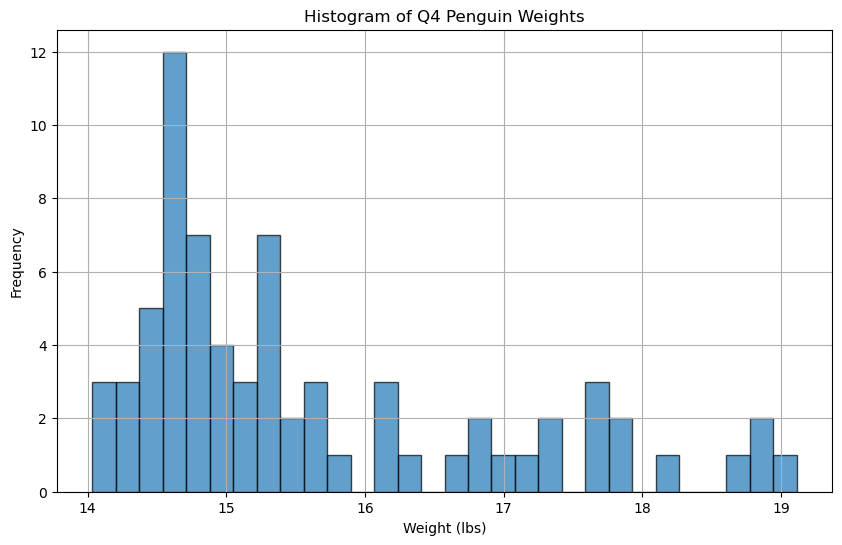

In [23]:
# Anaysis of Q4
Q4_penguins = grouped_adult_penguins[grouped_adult_penguins['quartiles_by_body_mass_lbs'] == 'Q4'] 

# Display number of unique species 
print('There are ', Q4_penguins['body_mass_lbs'].nunique(), 'unique weights in the dataset')
# Display range of unique weights
print(f'Range of weights: {Q4_penguins["body_mass_lbs"].min()} lbs to {Q4_penguins["body_mass_lbs"].max()} lbs')

# Ploting histogram of Q4 penguin weights to visualize distribution of weights and identify outliers
plt.figure(figsize=(10, 6))
plt.hist(Q4_penguins['body_mass_lbs'], bins=30, edgecolor='black', alpha=0.7)

plt.title('Histogram of Q4 Penguin Weights')
plt.xlabel('Weight (lbs)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Upper Quartile Mass by Species
* Overall the Gentoo penguins account for the majority of outlier weights for the adult penguins across all species with a few Chinstrap penguins in the middle of upper quartile range. 

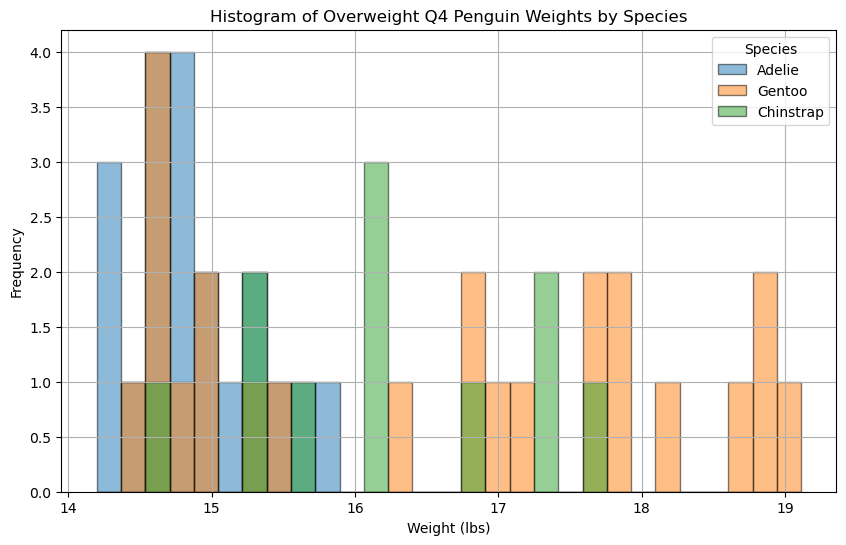

In [24]:
overweight_Q4_penguins = Q4_penguins[Q4_penguins['health_metrics'] == 'overweight']

# Plotting histogram of Overweight Q4 penguin weights to visualize distribution of the data and how it's spread out
bins = np.linspace(overweight_Q4_penguins['body_mass_lbs'].min(), overweight_Q4_penguins['body_mass_lbs'].max(), 30)  # Adjust bin edges based on data range

plt.figure(figsize=(10, 6))

for sp in overweight_Q4_penguins['species'].unique():
    subset = overweight_Q4_penguins[overweight_Q4_penguins['species'] == sp]
    plt.hist(subset['body_mass_lbs'], bins=bins, edgecolor='black', alpha=0.5, label=sp)

plt.title('Histogram of Overweight Q4 Penguin Weights by Species')
plt.xlabel('Weight (lbs)')
plt.ylabel('Frequency')
plt.legend(title='Species')
plt.grid(True)
plt.show()



### Details of the Top Ten Highest Weight Adult Penguins
* The male Gentoo penguins residing on Biscoe Island describe a majority of the outlier data values for weight
* Fish is the primary diet overall

In [25]:
# Sort by 'weight' in descending order
overweight_Q4_penguins_sorted = overweight_Q4_penguins.sort_values(by='body_mass_lbs', ascending=False)

# Display the top 10 rows with the highest weights
top_10_weights = overweight_Q4_penguins_sorted.head(11)
display(top_10_weights)

,year,diet,island,species,sex,health_metrics,body_mass_lbs,quartiles_by_body_mass_lbs
6,2021,fish,Biscoe,Gentoo,male,overweight,19.114055,Q4
95,2022,squid,Biscoe,Gentoo,male,overweight,18.869343,Q4
54,2022,fish,Biscoe,Gentoo,male,overweight,18.864340,Q4
213,2024,squid,Biscoe,Gentoo,male,overweight,18.618016,Q4
232,2025,fish,Biscoe,Gentoo,male,overweight,18.122068,Q4
170,2024,fish,Biscoe,Gentoo,male,overweight,17.878407,Q4
110,2023,fish,Biscoe,Gentoo,male,overweight,17.868974,Q4
58,2022,fish,Dream,Chinstrap,male,overweight,17.706773,Q4
275,2025,squid,Biscoe,Gentoo,male,overweight,17.695015,Q4
132,2023,krill,Biscoe,Gentoo,male,overweight,17.592868,Q4


<html>
<h2 style="background-color: #00364A;">
<font size="+2"><br>
    <font color=#F1C9FE><b>&nbsp;   &nbsp; Data Visualization </b></font>
    </font>  <br>
</h2>
</html>

<html>
<h2 style="background-color: #00364A;">
<font size="+1"><br>
    <font color=#F1C9FE><b>&nbsp;   &nbsp; Data Visualization #1: Stacked Area Chart </b></font>
    </font>  <br>
</h2>
</html>

In [34]:
penguins = pd.read_csv('palmerpenguins_extended.csv')

diet,fish,krill,parental,squid
year,,,,
2021,0.275281,0.382022,0.278090,0.064607
2022,0.259878,0.439210,0.243161,0.057751
2023,0.283453,0.423022,0.238849,0.054676
2024,0.302166,0.409350,0.233751,0.054732
2025,0.268957,0.404028,0.272512,0.054502


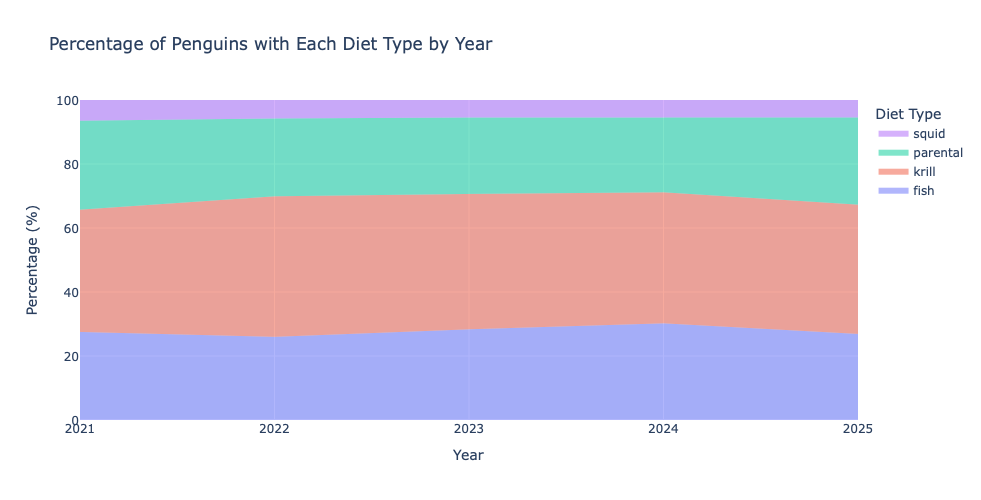

In [35]:
# Count the occurrences of each diet per year
diet_counts = penguins.groupby(['year', 'diet']).size().unstack(fill_value=0)
#display(diet_counts)

# Calculate proportions
diet_proportions = diet_counts.divide(diet_counts.sum(axis=1), axis=0)

# Display the resulting DataFrame
display(diet_proportions.head())

# Convert proportions into percentages and round to two decimal places
diet_percentages = (diet_proportions * 100).round(2)


# Create a stacked area chart with Plotly
fig = go.Figure()

# Add a trace for each diet type
for diet_type in diet_percentages.columns:
    fig.add_trace(go.Scatter(
        x=diet_percentages.index,
        y=diet_percentages[diet_type],
        mode='lines',
        stackgroup='one',  # This groups the traces into a stacked area chart
        name=diet_type,
        hoverinfo='x+y+name', # Show x (year), y (percentage), and name (diet_type) on hover
        line=dict(width=0)
    ))

# Update layout to make the plot more readable
fig.update_layout(
    title='Percentage of Penguins with Each Diet Type by Year',
    xaxis_title='Year',
    yaxis_title='Percentage (%)',
    xaxis=dict(
        tickmode='linear', # Ensure x-axis shows integer years
        tickvals=diet_percentages.index,
        ticktext=[int(year) for year in diet_percentages.index]
    ),
    yaxis=dict(
        tickformat='0', # Format y-axis to show integer values
        range=[0, 100] # Limit y-axis to range of 0 to 100
    ),
    legend_title='Diet Type',
    autosize=False, width=600, height=500
)

# Show the plot
fig.show()

Here, I wanted to visualize whether penguin diets changed over time by percentage of diet each year. 

I thought the stacked area chart would work best as it would show trends of each diet against the other diets and also show whether the percentage of different diets evolve over time. 

This visuaization shows that squid is a relatively small proportion of primary diet among penguins in this dataset with minimal variation over time, the same with the parental diet type. The krill and fish diets show some variabilty between the years, while krill appears to be the dominant primary diet among most penguins in this dataset. 

<html>
<h2 style="background-color: #00364A;">
<font size="+1"><br>
    <font color=#F1C9FE><b>&nbsp;   &nbsp; Data Visualization #2: Overlayed Histogram </b></font>
    </font>  <br>
</h2>
</html>

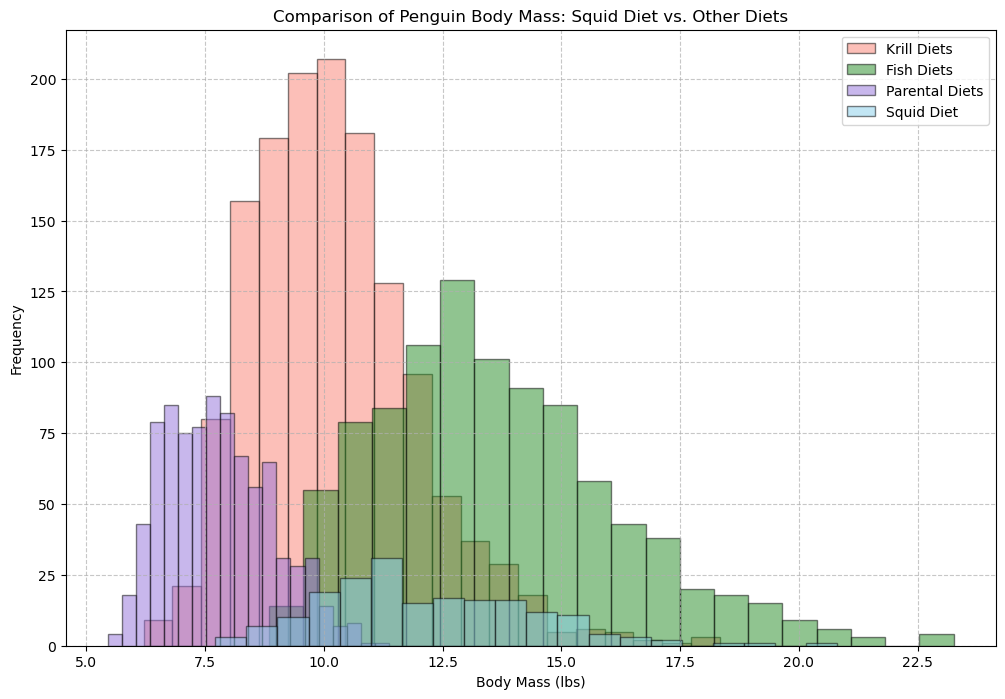

In [36]:
# Convert body_mass_g from grams into pounds
new_penguins = penguins.assign(body_mass_lbs=penguins.body_mass_g * 0.00220462)

# Filter for penguins with a diet of squid
squid_penguins = new_penguins[new_penguins['diet'] == 'squid']
krill_penguins = new_penguins[new_penguins['diet'] == 'krill']
fish_penguins = new_penguins[new_penguins['diet'] == 'fish']
parental_penguins = new_penguins[new_penguins['diet'] == 'parental']

# Create an overlayed histogram
plt.figure(figsize=(12, 8))

# Plot histogram for other diets
plt.hist(krill_penguins['body_mass_lbs'], bins=20, alpha=0.5, label='Krill Diets', color='salmon', edgecolor='black')

plt.hist(fish_penguins['body_mass_lbs'], bins=20, alpha=0.5, label='Fish Diets', color='forestgreen', edgecolor='black')

plt.hist(parental_penguins['body_mass_lbs'], bins=20, alpha=0.5, label='Parental Diets', color='mediumpurple', edgecolor='black')

# Plot histogram for squid-eating penguins
plt.hist(squid_penguins['body_mass_lbs'], bins=20, alpha=0.5, label='Squid Diet', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Body Mass (lbs)')
plt.ylabel('Frequency')
plt.title('Comparison of Penguin Body Mass: Squid Diet vs. Other Diets')
plt.legend()

# Show grid for readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()

I wanted to look at the diets and see how each diet effected the body mass of the penguins. I was curious about squid having a low percentage of primary diet among the penguins and I wanted to see if maybe the squid didn't offer as much nutrition as the other diets.

I selected a histogram for this visualization. The histogram shows the distribution of weight by diet type. Krill seems to provide the most steady weight and lowest overall weight distribution among primary diets. A primary diet of squid has the most variabiliy in penguin mass. It would be interesting to see whether this is influenced by size of squid. 

Based on the previous visualization, I wanted to explore the small percentage of penguins with squid as their primary diet. 

<html>
<h2 style="background-color: #00364A;">
<font size="+1"><br>
    <font color=#F1C9FE><b>&nbsp;   &nbsp; Data Visualization #3: Pair Plot </b></font>
    </font>  <br>
</h2>
</html>

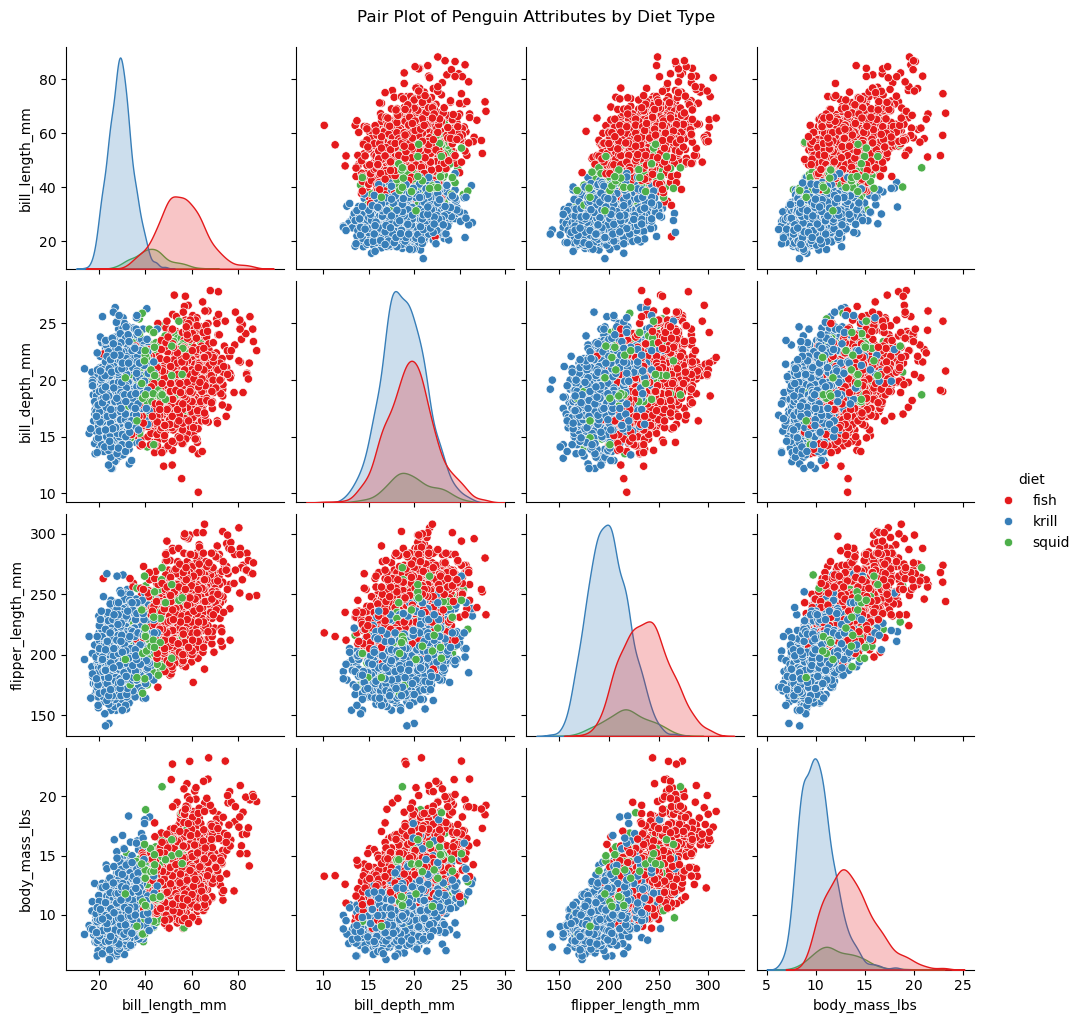

In [29]:
# Filter data to only include relevant diet groups
diet_groups = ['fish','krill','squid']
diet_penguins = new_penguins[new_penguins['diet'].isin(diet_groups)]

# Choose attributes to analyze
attributes = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_lbs']

# Create the pair plot
pairplot = sns.pairplot(diet_penguins, vars=attributes, hue='diet', palette='Set1', markers='o')

# Add labels and title
pairplot.fig.suptitle('Pair Plot of Penguin Attributes by Diet Type', y=1.02)

# Show the plot
plt.show()

Here, I wanted to look into how primary diet type relates to the penguins' attributes in the dataset: flipper length, bill length, bill depth, and body mass. 

I chose a pair plot for the visualization of this data. The pair plot proveds a comprehensive look at how each penguin attribute paired against another penguin attribute relates to the primary diet of each penguin in the dataset.

The results show an interesting correlation between the flipper length vs. body mass, bill length vs. flipper length, and bill length vs. body mass. The distribution of primary diets among these attributes show a strong correlation between the type of diet and the size of each attribute (weight, flipper, bill). The penguins with a primary diet of fish tend to have larger body mass, longer flippers, and longer bills. 

<html>
<h2 style="background-color: #00364A;">
<font size="+1"><br>
    <font color=#F1C9FE><b>&nbsp;   &nbsp; Data Visualization #4: Facet Grid </b></font>
    </font>  <br>
</h2>
</html>

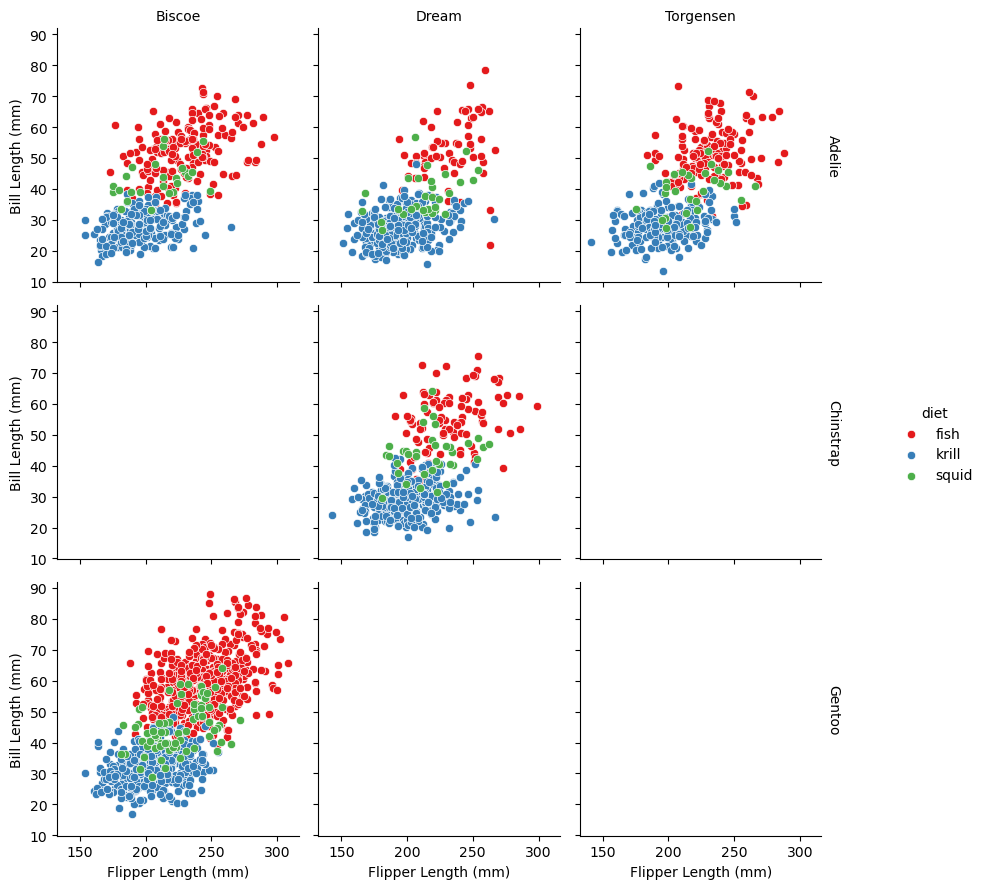

In [30]:
# Create a facet grid to compare diet types across species and island locations
g = sns.FacetGrid(diet_penguins, col='island', row='species', hue='diet', margin_titles=True, palette='Set1')
g.map_dataframe(sns.scatterplot, x='flipper_length_mm', y='bill_length_mm')

# Create labels, title and legend
g.set_axis_labels('Flipper Length (mm)', 'Bill Length (mm)')
g.set_titles(col_template='{col_name}', row_template='{row_name}')
g.add_legend()

# Adjust layout
g.tight_layout()

# Show plot
plt.show()

Here, I wanted to look at how the flipper length and bill length compared across species and location based on primary diet. 

I chose a facet grid to display the data for bill length, flipper length, species and location to discover how these variable interact and differ across different subsets of the data. By plotting the flipper length and bill length on the x and y axes within each facet, I can see how the attributes vary between species or locations and see their relationship to the primary diet type of the penguin. 

The penguins on Dream island seem to mainly have a primary diet of krill, while a longer bill length correlates with a primary diet of fish.  The Gentoo species has the tightest distribution of data where there seems to be a strong correlation between flipper and bill length with primary diet. 

<html>
<h2 style="background-color: #00364A;">
<font size="+1"><br>
    <font color=#F1C9FE><b>&nbsp;   &nbsp; Data Visualization #5: Interactive Histogram </b></font>
    </font>  <br>
</h2>
</html>

In [31]:
# Create a copy of the DataFrame to work with a slice of it
new_penguins_copy = new_penguins.copy()

# Filter out the 'parental' diet category
filtered_penguins_copy = new_penguins_copy[new_penguins_copy['diet'] != 'parental'].copy()

# Ensure 'diet' column is a categorical type
filtered_penguins_copy['diet'] = filtered_penguins_copy['diet'].astype('category')

# Create a color map
unique_diets = filtered_penguins_copy['diet'].cat.categories
colors = px.colors.qualitative.Plotly
color_map = {diet: colors[i % len(colors)] for i, diet in enumerate(unique_diets)}

# Create an interactive histogram 
fig = px.histogram(
    filtered_penguins_copy, 
    x='flipper_length_mm', 
    color='diet', 
    color_discrete_map=color_map,  # Set color palette
    barmode='stack',
    labels={'flipper_length_mm': 'Flipper Length (mm)', 'count': 'Count'},
    title='Distribution of Penguin Flipper Length by Diet Type',
    hover_data={'flipper_length_mm': True, 'diet': True}   # Customize hover data
)  

# Show the plot
fig.show()

In [32]:
# Create an interactive histogram 
fig = px.histogram(
    filtered_penguins_copy, 
    x='bill_length_mm', 
    color='diet', 
    color_discrete_map=color_map,  # Set color palette
    barmode='stack',
    labels={'bill_length_mm': 'Bill Length (mm)', 'count': 'Count'},
    title='Distribution of Penguin Bill Length by Diet Type',
    hover_data={'bill_length_mm': True, 'diet': True}   # Customize hover data
)  

# Show the plot
fig.show()

Based on the previous visualization, I wanted to take another look at the bill length and flipper length as it relates to each penguin's primary diet through the use of an interactive histogram. This way, the data points along the histogram can display the data related to the frequency. 

I chose to use two interactive histograms to separately investigate bill lengths and flipper lengths. Each histogram will show how each attribute is distributed across different diet types and determine whether certain diet types are associated with longer or shorter attributes (bill or flipper). 

The penguin flipper length shows minimal impact on a primary diet of squid or krill. However, the longer flippers strongly correlate with a primary diet of fish for the penguins in the dataset. Looking at the penguin bill length, the smaller bills show a primary diet of mainly krill. Some smaller billed penguins have a primary diet of squid, but they may be smaller squid. Among the penguins with the larger bills, their primary diets are squid or fish. This makes sense as these sources of food are much larger than krill. 

<html>
<h2 style="background-color: #00364A;">
<font size="+2"><br>
    <font color=#F1C9FE><b>&nbsp;   &nbsp; Data Modeling </b></font>
    </font>  <br>
</h2>
</html>

<html>
<h2 style="background-color: #00364A;">
<font size="+1"><br>
    <font color=#F1C9FE><b>&nbsp;   &nbsp; Linear Regression </b></font>
    </font>  <br>
</h2>
</html>

In [33]:
#define predictor and response variables
y = penguins['body_mass_g']
x = penguins['bill_length_mm']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model_bodymass = sm.OLS(y, x).fit()

#view model summary
print(model_bodymass.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     2662.
Date:                Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                        11:51:02   Log-Likelihood:                -28503.
No. Observations:                3430   AIC:                         5.701e+04
Df Residuals:                    3428   BIC:                         5.702e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2299.6569     51.923     44.

Based on the OLS regression, with a significance level of less than .001 on average, an increase of one mm in bill length is associated with a 65.79 increase in body mass (g) of a penguin, all else constant.  

<html>
<h2 style="background-color: #00364A;">
<font size="+2"><br>
    <font color=#F1C9FE><b>&nbsp;   &nbsp; Results & Recommendations </b></font>
    </font>  <br>
</h2>
</html>

N/A